In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("car.csv")
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
print(dataset.shape)
cat = ["fuel", "transmission", "owner"]
for i in cat:
    print(dataset[i].unique())

(4340, 8)
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [3]:
#check for null values
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
dataset.drop(["name"], axis=1, inplace=True)
dataset["year_old"] = 2020 #converting years to a more mathematical value for better prediction result
dataset["year_old"] -= dataset["year"]
print(dataset.head())

   year  selling_price  km_driven    fuel seller_type transmission  \
0  2007          60000      70000  Petrol  Individual       Manual   
1  2007         135000      50000  Petrol  Individual       Manual   
2  2012         600000     100000  Diesel  Individual       Manual   
3  2017         250000      46000  Petrol  Individual       Manual   
4  2014         450000     141000  Diesel  Individual       Manual   

          owner  year_old  
0   First Owner        13  
1   First Owner        13  
2   First Owner         8  
3   First Owner         3  
4  Second Owner         6  


In [5]:
dataset.drop(["year"], axis=1, inplace=True)
dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,year_old
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,6
4336,409999,80000,Diesel,Individual,Manual,Second Owner,6
4337,110000,83000,Petrol,Individual,Manual,Second Owner,11
4338,865000,90000,Diesel,Individual,Manual,First Owner,4


In [6]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset


,selling_price,km_driven,year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,6,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,11,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,4,1,0,0,0,1,0,1,0,0,0,0


In [7]:
dataset.corr()

,selling_price,km_driven,year_old,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
year_old,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


<AxesSubplot:>

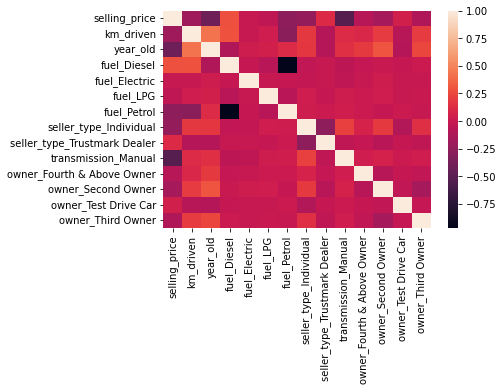

In [8]:
import seaborn as sns 
sns.heatmap(dataset.corr())

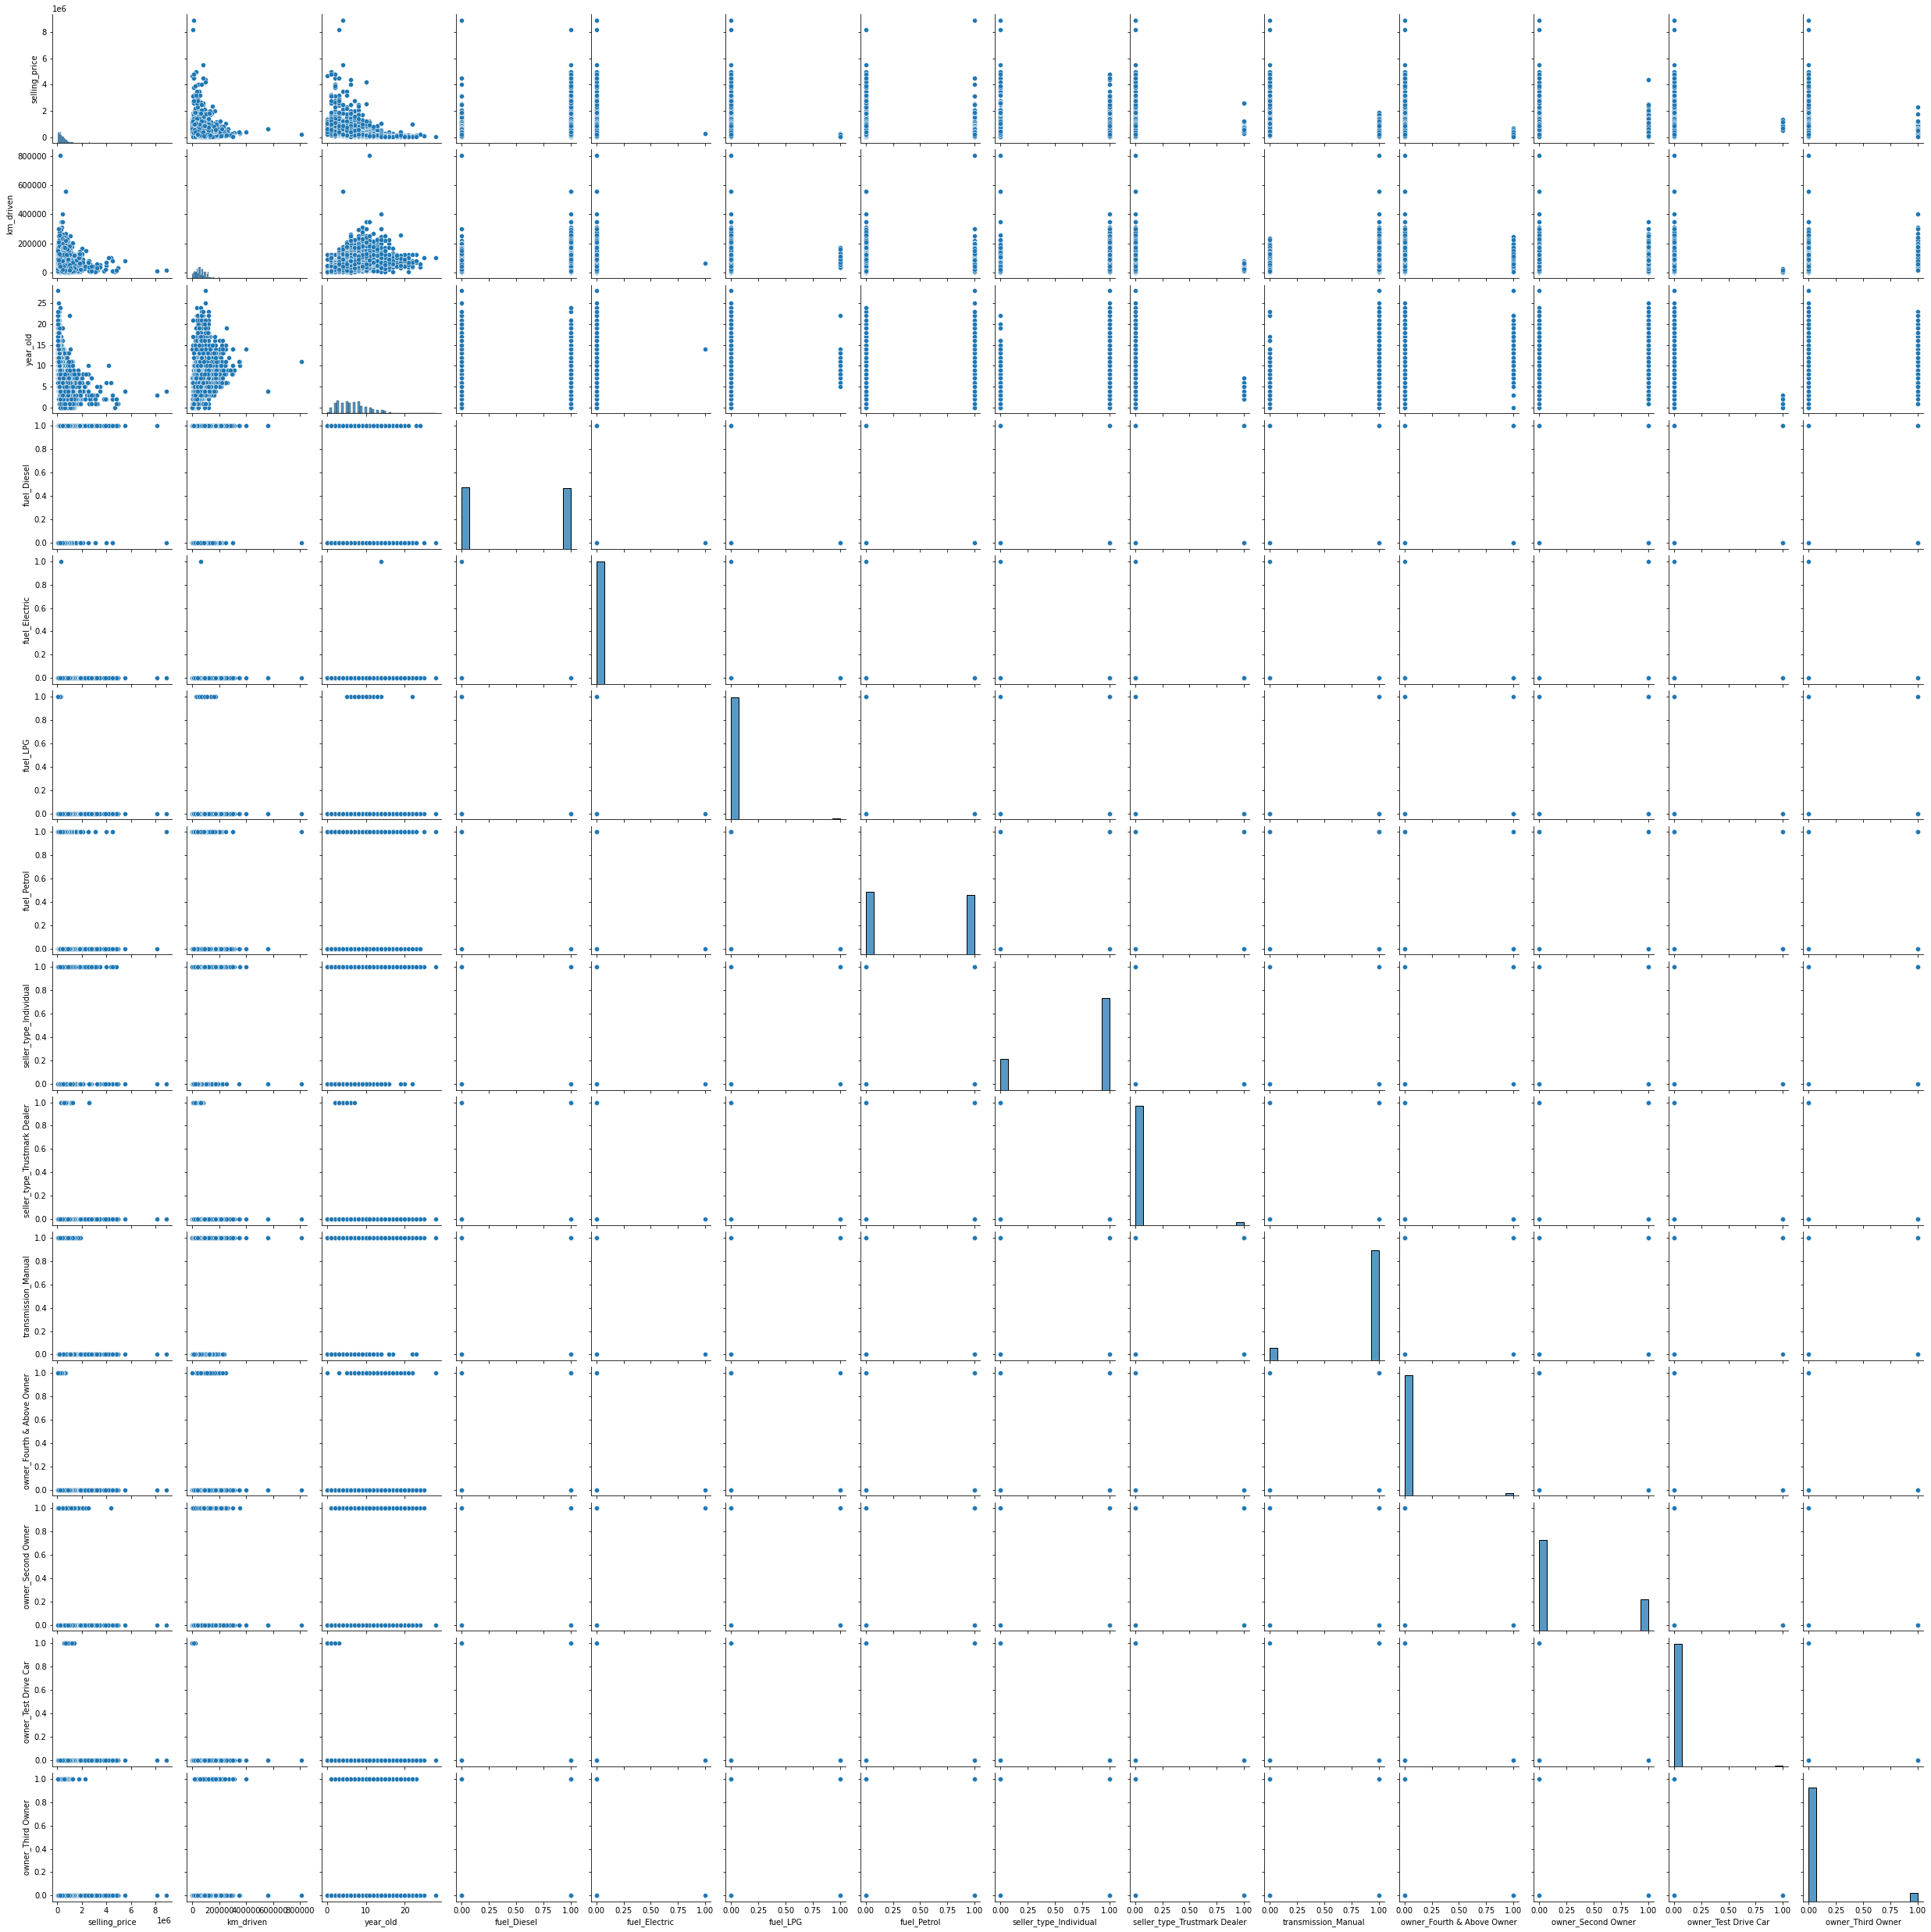

In [9]:
sns.pairplot(dataset)

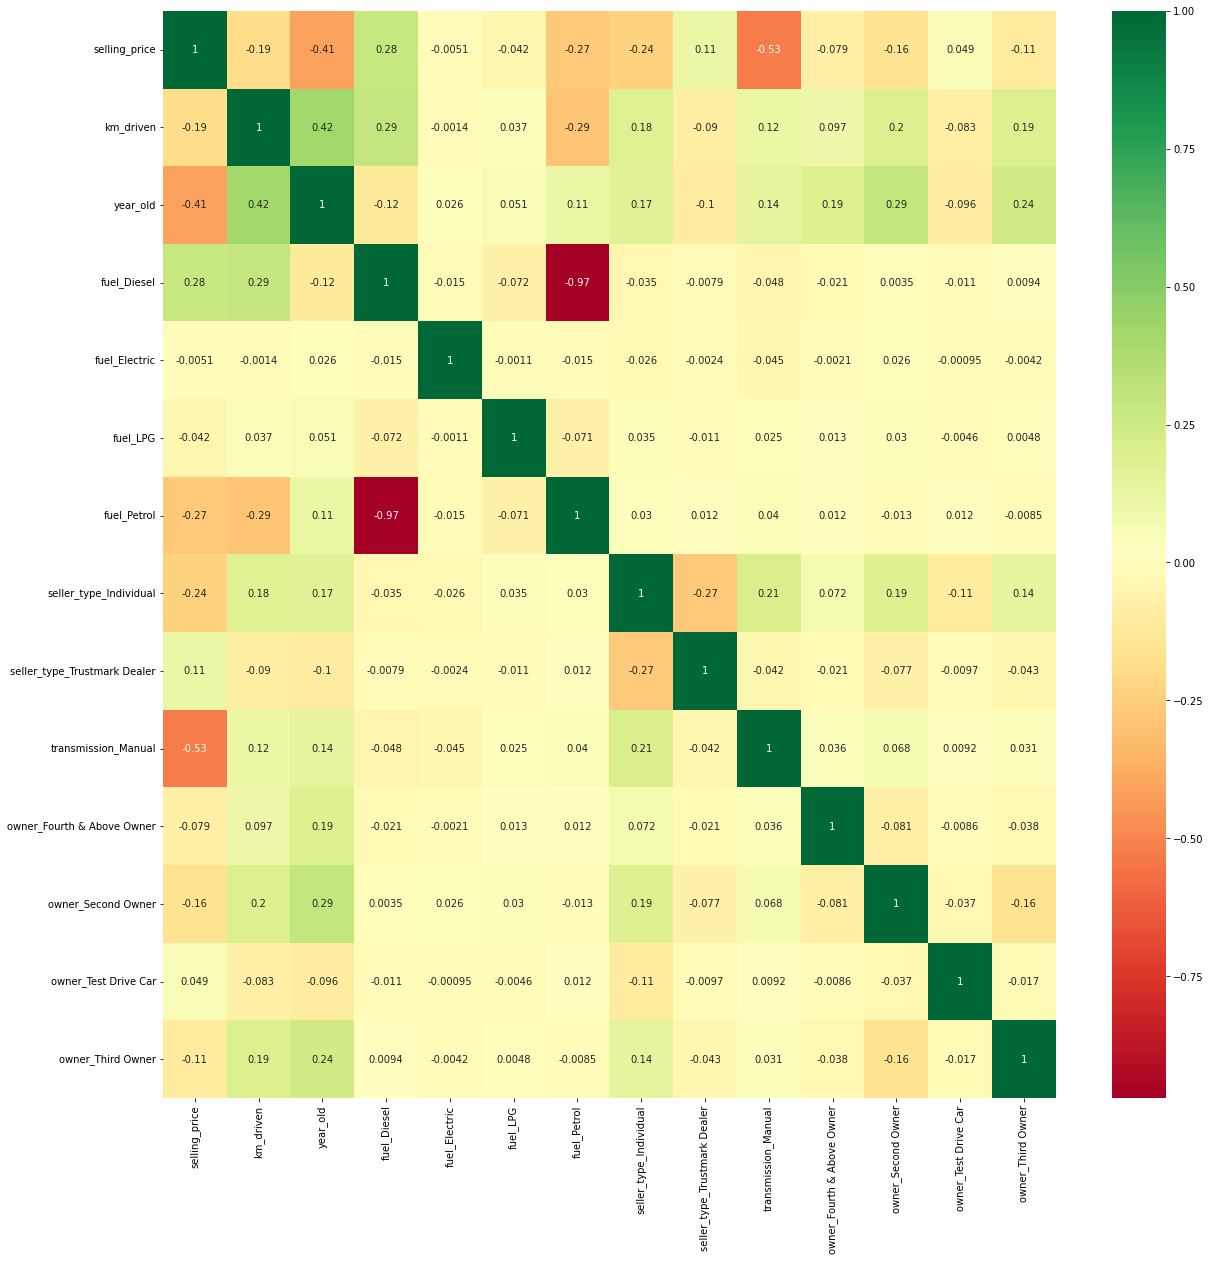

In [10]:
import matplotlib.pyplot as plt
corrmat=dataset.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) #plot heat map g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)

[[ 70000     13      0 ...      0      0      0]
 [ 50000     13      0 ...      0      0      0]
 [100000      8      1 ...      0      0      0]
 ...
 [ 83000     11      0 ...      1      0      0]
 [ 90000      4      1 ...      0      0      0]
 [ 40000      4      0 ...      0      0      0]]


In [12]:
print(X.shape)

(4340, 13)


In [13]:
from sklearn.ensemble import ExtraTreesRegressor as ETR, RandomForestRegressor 
model = ETR()
model.fit(X,y)
print(model.feature_importances_)

[2.47290368e-01 2.48714842e-01 1.30646994e-01 3.08288702e-05
 2.57956539e-05 2.13300366e-04 4.54338301e-02 8.62718677e-03
 2.92836706e-01 7.71440104e-04 2.07373686e-02 5.05543597e-04
 4.16579539e-03]


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape
y_train.shape

(3472,)

In [15]:
para = [{ "n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
         "max_features":["auto", "sqrt"],
         "max_depth":[int(x) for x in np.linspace(5, 30, num = 6)],
         "min_samples_split" : [2, 5, 10, 15, 100],
         "min_samples_leaf" : [1, 2, 5, 10]}]
rf = RandomForestRegressor()
gs = RandomizedSearchCV(estimator = rf, param_distributions = para, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)
gs.fit(X_train, y_train)
best_acc = gs.best_score_
best_para = gs.best_params_
print(best_acc)
print(best_para)

-129300837788.45508
{'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


In [16]:
predictions=gs.predict(X_test)

C:\Users\yash0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

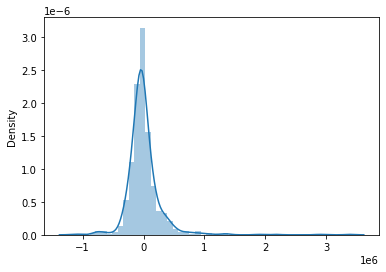

In [17]:
sns.distplot(y_test-predictions)

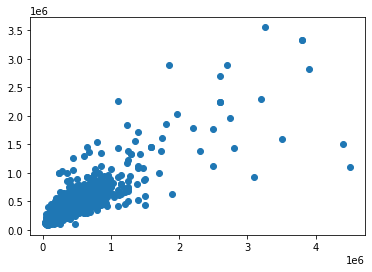

In [18]:
plt.scatter(y_test,predictions)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print(r2_score(y_test, predictions))

MAE: 163574.37955689445
MSE: 86766118674.48828
RMSE: 294560.89128478727
0.6832557706178457


In [24]:
import pickle
import bz2file as bz2


# file = open("RandomForest.pkl", "wb")
# pickle.dump(gs, file) #takes to argument, first is the object to be packed/stored, 2nd is the file obj
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

compressed_pickle('RandomForest', gs)